In [15]:
import glob
import os
import sys
from matplotlib import pyplot as plt


In [2]:
class rocket_sensor_data_log:
    def __init__(self, time, t_t1, t_t2, c_t1, c_t2, c_t3, t_p1, t_p2, t_p, t_l, t1):
        self.time = time

        self.t_t1 = t_t1
        self.t_t2 = t_t2

        self.c_t1 = c_t1
        self.c_t2 = c_t2
        self.c_t3 = c_t3

        self.t_p1 = t_p1
        self.t_p2 = t_p2

        self.t_p = t_p

        self.t_l = t_l

        self.t1 = t1

sensor_data_arr = []

In [3]:
class msg_sent_log:
    def __init__(self, time, cmd, id, size, data):
        self.time = time
        self.cmd = cmd
        self.id = id
        self.size = size
        
        self.data = []
        for i in data: self.data.append(i)

msg_sent_arr = []

In [4]:
class state_change_log:
    def __init__(self, time, state):
        self.time = time
        self.state = state

state_change_arr = []

In [5]:
SENSOR_READING = 0
MSG_RECEIVED = 1
MSG_SENT = 2
SYSTEM_ERROR = 3
STATE_CHANGE = 4
EVENT_REACTION = 5

In [24]:
buff = []
list_of_files = glob.glob('logs/*.bin') # * means all if need specific format then *.csv
file = max(list_of_files, key=os.path.getctime) # get the latest file
#file = 'log.bin' # get specific file
with open(file, 'rb') as f:
    buff.append(f.read())
buff = buff[0]

#print(buff)
#for x in buff: print(hex(x))

In [25]:
sensor_data_arr = []
msg_sent_arr = []
state_change_arr = []

sensor_count = 0
msg_count = 0
state_count = 0

index = 0
while True:
    if index >= len(buff): break

    if(buff[index] == SENSOR_READING):
        sensor_count += 1
        time = int.from_bytes(buff[index + 1 : index + 5], byteorder='big', signed=True) 

        t_t1 = int.from_bytes(buff[index + 5 : index + 7], byteorder='big', signed=True) 
        t_t2 = int.from_bytes(buff[index + 7 : index + 9], byteorder='big', signed=True)

        c_t1 = int.from_bytes(buff[index + 9 : index + 11], byteorder='big', signed=True)
        c_t2 = int.from_bytes(buff[index + 11 : index + 13], byteorder='big', signed=True)
        c_t3 = int.from_bytes(buff[index + 13 : index + 15], byteorder='big', signed=True)

        t_p1 = int.from_bytes(buff[index + 15 : index + 17], byteorder='big', signed=True)
        t_p2 = int.from_bytes(buff[index + 17 : index + 19], byteorder='big', signed=True)

        t_p = int.from_bytes(buff[index + 19 : index + 21], byteorder='big', signed=True)
        t_l = int.from_bytes(buff[index + 21 : index + 23], byteorder='big', signed=True)

        tactile = int.from_bytes(buff[index + 23 : index + 24], byteorder='big', signed=True)

        sensor_data_arr.append(rocket_sensor_data_log(time, t_t1, t_t2, c_t1, c_t2, c_t3, t_p1, t_p2, t_p, t_l, tactile))
        index += 24

    elif(buff[index] == MSG_RECEIVED):
        msg_count += 1
        time = int.from_bytes(buff[index + 1 : index + 5], byteorder='big', signed=True) 
        cmd = int.from_bytes(buff[index + 5 : index + 6], byteorder='big', signed=True) 
        id = int.from_bytes(buff[index + 6 : index + 7], byteorder='big', signed=True) 
        size = int.from_bytes(buff[index + 7 : index + 8], byteorder='big', signed=True) 
        
        data = []
        for i in range(size):
            data.append(int.from_bytes(buff[index + 8 + i : index + 9 + i], byteorder='big', signed=False))
        
        msg_sent_arr.append(msg_sent_log(time, cmd, id, size, data))
        #print(index, time, cmd, id, size)
        index += 8 + size

    elif(buff[index] == STATE_CHANGE):
        state_count += 1
        time = int.from_bytes(buff[index + 1 : index + 5], byteorder='big', signed=True) 
        state = int.from_bytes(buff[index + 5 : index + 6], byteorder='big', signed=False) 

        state_change_arr.append(state_change_log(time, state))

        index += 6

    else:
        index += 1

print("Sensor count: ", sensor_count)
print("Msg count: ", msg_count)
print("State count: ", state_count)

Sensor count:  0
Msg count:  200
State count:  0


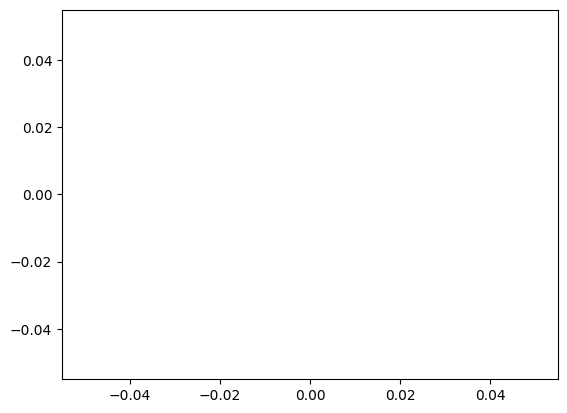

In [20]:
#make plots

fig, ax = plt.subplots()

#plot tank temperatures
x = [log.time for log in sensor_data_arr]
ax.plot(x, [log.t_t1  for log in sensor_data_arr])
ax.plot(x, [log.t_t2 for log in sensor_data_arr])
ax.plot(x, [log.c_t1 for log in sensor_data_arr])
ax.plot(x, [log.c_t2 for log in sensor_data_arr])
ax.plot(x, [log.c_t3 for log in sensor_data_arr])

ax.vlines([log.time for log in state_change_arr], 200, 1000, colors='y')
#ax.vlines([log.time for log in msg_sent_arr], 0, 1000, colors='g')
plt.show()

[3220, 4221, 5222, 6223, 7224, 8225, 9225, 10226, 11227, 11549, 11600, 11651, 11702, 11753, 11804, 11855, 11906, 11957, 12008, 12059, 12110, 12161, 12212, 12263, 12313, 12365, 12416, 12467, 12518, 12569, 12620, 12671, 12722, 12773, 12824, 12875, 12926, 12977, 13028, 13079, 13130, 13181, 13232, 13283, 13334, 13385, 13436, 13487, 13538, 13589, 13640, 13691, 13742, 13793, 13844, 13895, 13946, 13997, 14048, 14099, 14150, 14201, 14252, 14303, 14354, 14405, 14456, 14507, 14558, 14609, 14660, 14711, 14762, 14813, 14864, 14915, 14966, 15017, 15068, 15119, 15170, 15221, 15272, 15323, 15374, 15425, 15476, 15527, 15577, 15629, 15680, 15731, 15782, 15833, 15884, 15935, 15986, 16037, 16088, 16139, 16190, 16240, 16292, 16343, 16394, 16445, 16496, 16547, 16598, 16649, 16699, 16751, 16802, 16853, 16904, 16955, 17006, 17057, 17108, 17159, 17210, 17261, 17312, 17363, 17415, 17464, 17516, 17567, 17618, 17669, 17720, 17771, 17822, 17873, 17924, 17975, 18026, 18077, 18128, 18179, 18230, 18281, 18332, 18383

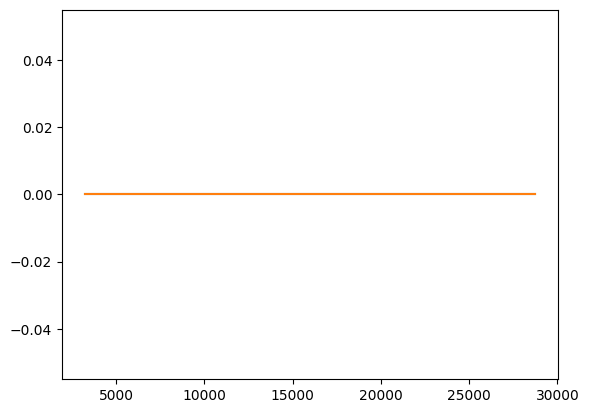

In [26]:
#make plots

fig, ax = plt.subplots()

#plot tank temperatures
x = [log.time for log in msg_sent_arr if log.cmd == 0]
y1 = [int.from_bytes(log.data[1 : 3], byteorder='big', signed=True) for log in msg_sent_arr if log.cmd == 0]
y2 = [int.from_bytes(log.data[3 : 5], byteorder='big', signed=True) for log in msg_sent_arr if log.cmd == 0]

print(x)

ax.plot(x, y1)
ax.plot(x, y2)

plt.show()